In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
import math

In [3]:
data=pd.read_csv('data.csv')

In [4]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [5]:
data= data.drop(['Unnamed: 0'], axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1111742 non-null  object 
 1   groupId          1111742 non-null  object 
 2   matchId          1111742 non-null  object 
 3   assists          1111742 non-null  int64  
 4   boosts           1111742 non-null  int64  
 5   damageDealt      1111742 non-null  float64
 6   DBNOs            1111742 non-null  int64  
 7   headshotKills    1111742 non-null  int64  
 8   heals            1111742 non-null  int64  
 9   killPlace        1111742 non-null  int64  
 10  killPoints       1111742 non-null  int64  
 11  kills            1111742 non-null  int64  
 12  killStreaks      1111742 non-null  int64  
 13  longestKill      1111742 non-null  float64
 14  matchDuration    1111742 non-null  int64  
 15  matchType        1111742 non-null  object 
 16  maxPlace         1

In [7]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

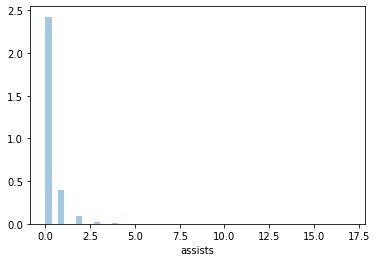

In [10]:
sns.distplot(data['assists'])

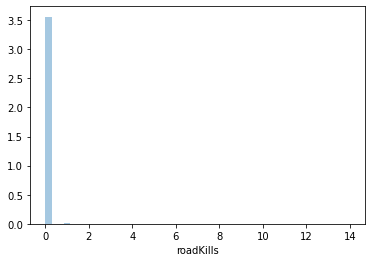

In [11]:
sns.distplot(data['roadKills'])

In [14]:
df=data

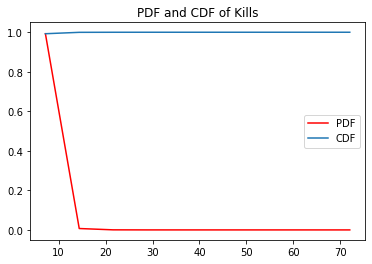

In [15]:
count, bins_count = np.histogram(data.kills, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.title('PDF and CDF of Kills')
plt.legend()

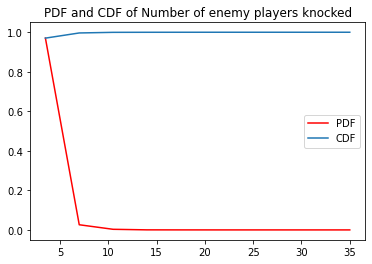

In [16]:
count, bins_count = np.histogram(df.DBNOs, bins=10)
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.title('PDF and CDF of Number of enemy players knocked')
plt.legend()

In [17]:
def visualization (col, num_bin=10):
    title = col[0].upper() + col[1:]
    f,axes=plt.subplots()
    plt.xlabel(title)
    plt.ylabel('Log Count')
    axes.set_yscale('log')
    data.hist(column=col,ax=axes,bins=num_bin)
    plt.title('Histogram of ' + title)
    plt.show()
    
    tmp = data[col].value_counts().sort_values(ascending=False)

    print('Min value of ' + title + ' is: ',min(tmp.index))
    print('Max value of ' + title + ' is: ',max(tmp.index))

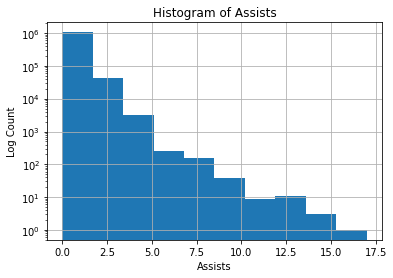

Min value of Assists is:  0
Max value of Assists is:  17


In [18]:
visualization('assists')

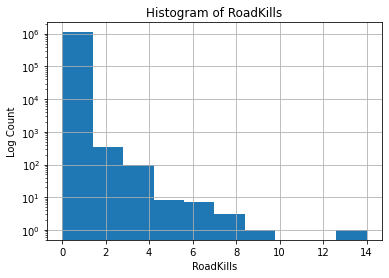

Min value of RoadKills is:  0
Max value of RoadKills is:  14


In [19]:

visualization('roadKills')

In [20]:
data.drop(data[data['roadKills']>=10].index,inplace=True)

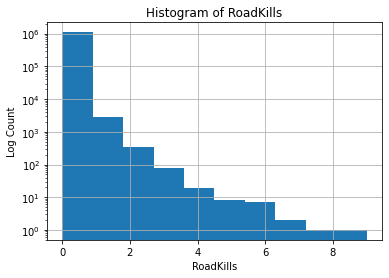

Min value of RoadKills is:  0
Max value of RoadKills is:  9


In [21]:
visualization('roadKills')

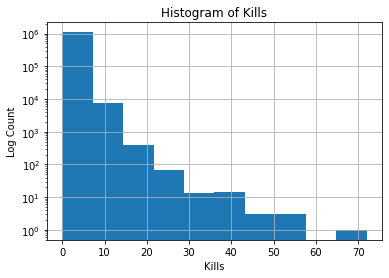

Min value of Kills is:  0
Max value of Kills is:  72


In [22]:
visualization('kills')

In [23]:
data.drop(data[data['kills']>=35].index,inplace=True)

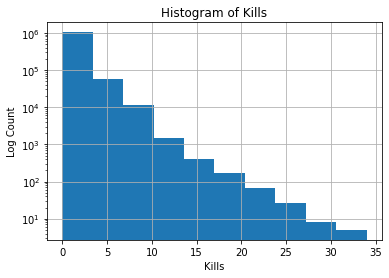

Min value of Kills is:  0
Max value of Kills is:  34


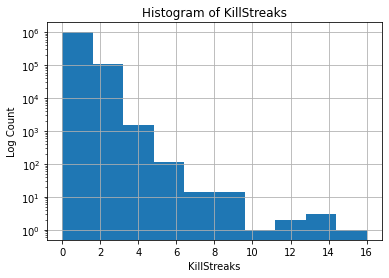

Min value of KillStreaks is:  0
Max value of KillStreaks is:  16


In [24]:
visualization('kills')
visualization('killStreaks')

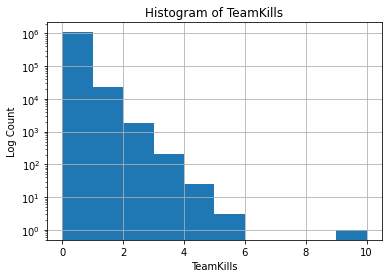

Min value of TeamKills is:  0
Max value of TeamKills is:  10


In [25]:

visualization('teamKills')

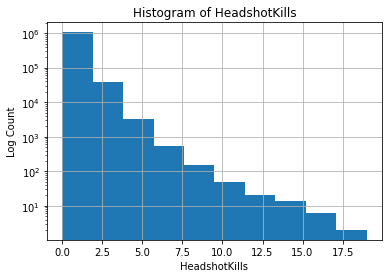

Min value of HeadshotKills is:  0
Max value of HeadshotKills is:  19


In [26]:
visualization('headshotKills', num_bin=10)

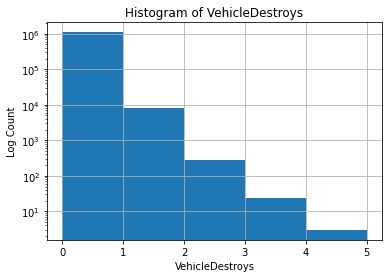

Min value of VehicleDestroys is:  0
Max value of VehicleDestroys is:  5


In [27]:
    visualization('vehicleDestroys',num_bin=5)

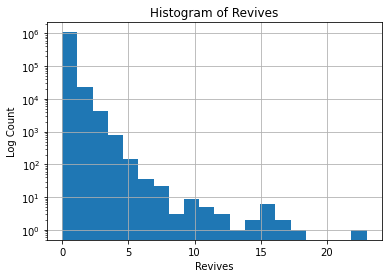

Min value of Revives is:  0
Max value of Revives is:  23


In [28]:

visualization('revives',num_bin=20)

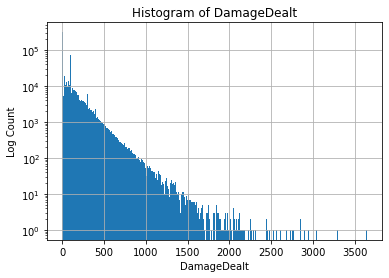

Min value of DamageDealt is:  0.0
Max value of DamageDealt is:  3645.0


In [29]:
visualization('damageDealt', num_bin=1000)

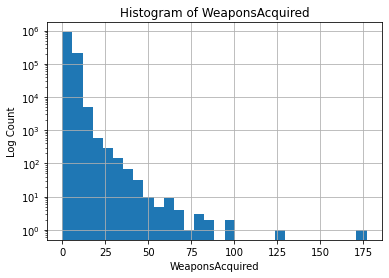

Min value of WeaponsAcquired is:  0
Max value of WeaponsAcquired is:  177


In [30]:
visualization('weaponsAcquired',num_bin=30)

In [31]:
data.drop(data[data.weaponsAcquired>=50].index,inplace=True)

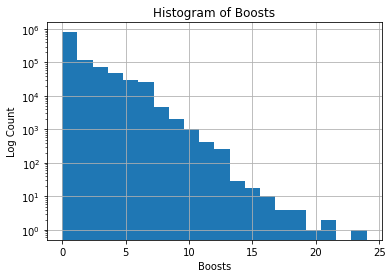

Min value of Boosts is:  0
Max value of Boosts is:  24


In [32]:
visualization('boosts',num_bin=20)

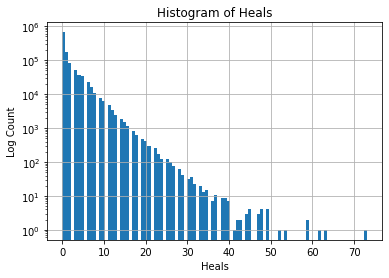

Min value of Heals is:  0
Max value of Heals is:  73


In [33]:

visualization('heals', num_bin=100)

In [34]:
data.drop(data[data.heals>=40].index,inplace=True)

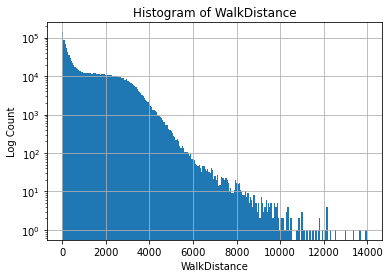

Min value of WalkDistance is:  0.0
Max value of WalkDistance is:  13960.0


In [35]:
visualization('walkDistance',num_bin=250)

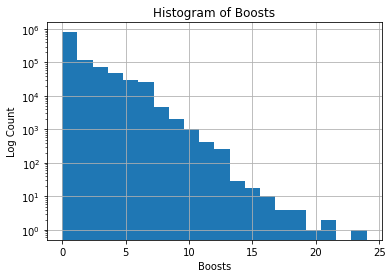

Min value of Boosts is:  0
Max value of Boosts is:  24


In [36]:
visualization('boosts',num_bin=20)

In [37]:
data.drop(data[data['walkDistance']>=10000].index,inplace=True)

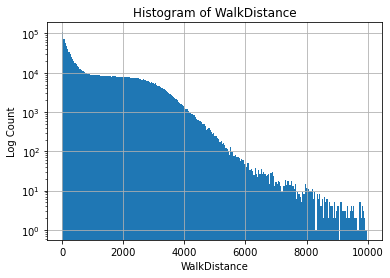

Min value of WalkDistance is:  0.0
Max value of WalkDistance is:  9969.0


In [38]:
visualization('walkDistance',num_bin=250)

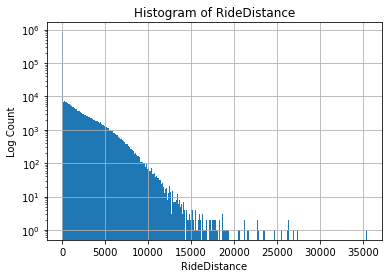

Min value of RideDistance is:  0.0
Max value of RideDistance is:  35400.0


In [39]:
visualization('rideDistance',num_bin=500)

In [40]:
data.drop(data[data.rideDistance >=15000].index, inplace=True)

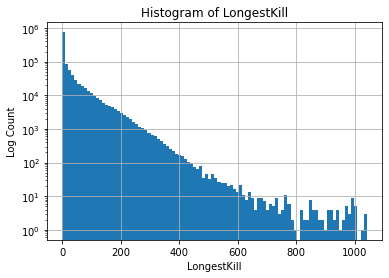

Min value of LongestKill is:  0.0
Max value of LongestKill is:  1040.0


In [41]:
visualization('longestKill', num_bin=100)

In [42]:
data.drop(data[data['longestKill']>=800].index,inplace=True)

In [43]:
data.shape

(1111398, 29)

In [44]:
cols_to_drop = ['Id','matchId','groupId','matchType']
cols_to_fit = [col for col in data.columns if col not in cols_to_drop]
corr = data[cols_to_fit].corr()

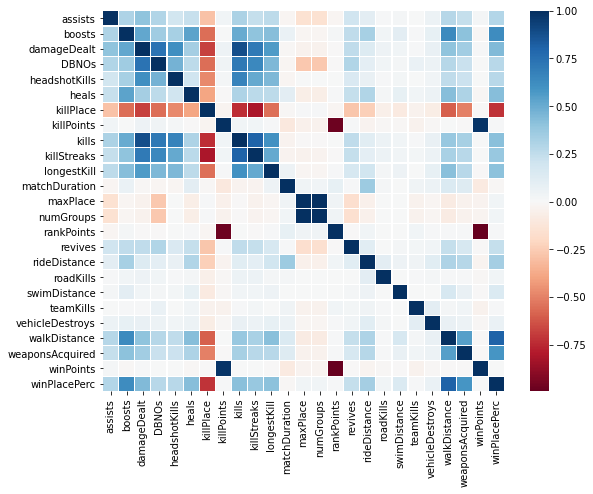

In [45]:
plt.figure(figsize=(9,7))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,linecolor='white',linewidths=0.1,cmap='RdBu')
plt.show()

In [46]:
df=data

In [47]:
print('The average person kills {:.4f} players'.format(df['kills'].mean()))
print('50% of people have ',df['kills'].quantile(0.50),' kills or less')
print('75% of people have ',df['kills'].quantile(0.75),' kills or less')
print('99% of people have ',df['kills'].quantile(0.99),' kills or less')
print('while the most kills recorded in the data is', df['kills'].max())

The average person kills 0.9238 players
50% of people have  0.0  kills or less
75% of people have  1.0  kills or less
99% of people have  7.0  kills or less
while the most kills recorded in the data is 34


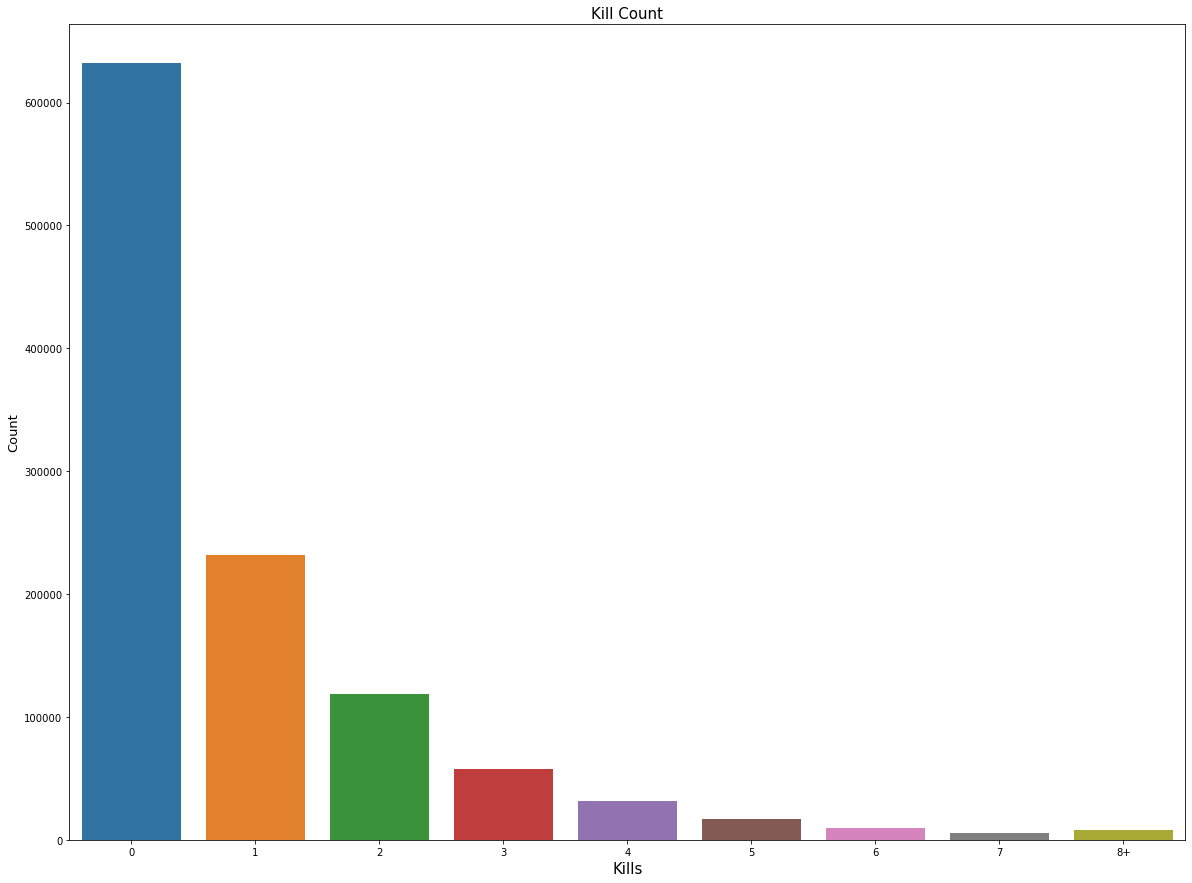

In [48]:
data = df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(20,15))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title('Kill Count',fontsize=15)
plt.xlabel('Kills', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.show()

#### Maximum number of enemy players killed in a short time
This is the number of enemy players killed in a short time by each player.

In [49]:
df['matchType'].value_counts()

squad-fpp           438716
duo-fpp             249889
squad               156521
solo-fpp            133782
duo                  78023
solo                 45642
normal-squad-fpp      4266
crashfpp              1581
normal-duo-fpp        1397
flaretpp               633
normal-solo-fpp        434
flarefpp               180
normal-squad           131
crashtpp                86
normal-solo             71
normal-duo              46
Name: matchType, dtype: int64

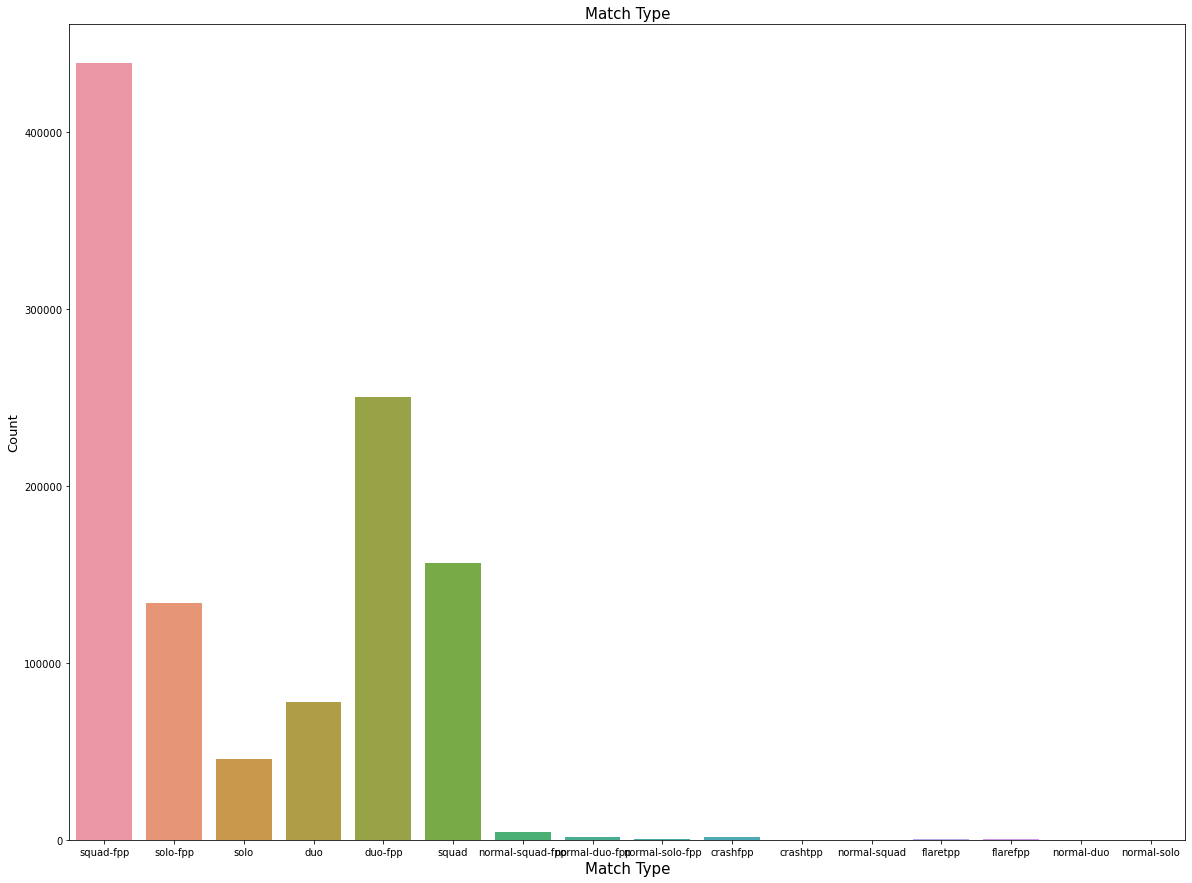

In [50]:
plt.figure(figsize=(20,15))
sns.countplot(df['matchType'], )
plt.title('Match Type',fontsize=15)
plt.xlabel('Match Type', fontsize=15)
plt.ylabel('Count',fontsize=13)
plt.show()

Observations :
#### From the above graph, it is clear that the most played matchtype is squad-fpp
#### The least played matchtype is normal-duo

### Damage to enemy players:

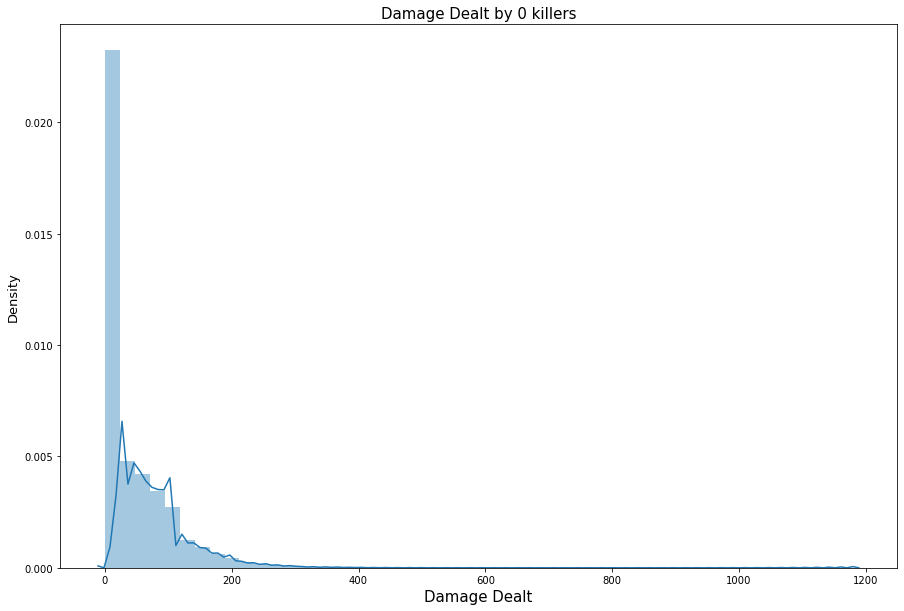

In [51]:
data = df.copy()

data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title('Damage Dealt by 0 killers',fontsize=15)
sns.distplot(data['damageDealt'])
plt.xlabel('Damage Dealt', fontsize=15)
plt.ylabel('Density',fontsize=13)
plt.show()

Here, we see a distribution of how much damage, players that dont kill anyone, can inflict on there enemies. We can see that most players dont deal out too much, this is most likely all the new players trying to figure out the controls and getting to know the game while they continually get beaten up by the more expereince players.

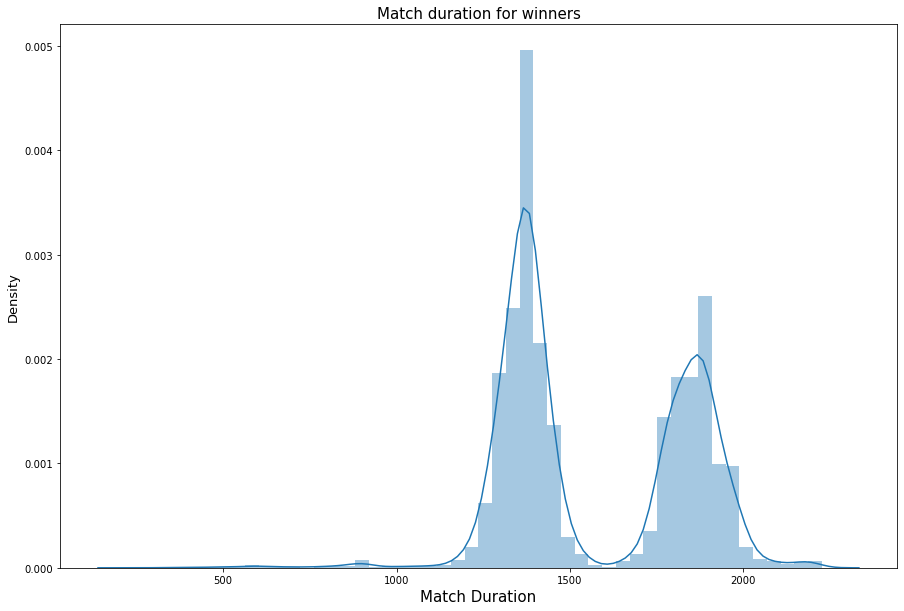

In [52]:
data = df[df['winPlacePerc'] == 1]

plt.figure(figsize=(15,10))
plt.title('Match duration for winners',fontsize=15)
sns.distplot(data['matchDuration'])
plt.xlabel('Match Duration', fontsize=15)
plt.ylabel('Density',fontsize=13)
plt.show()

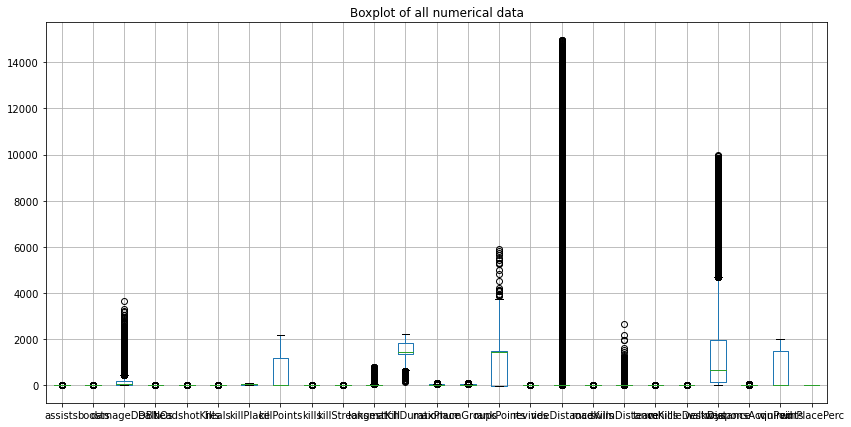

In [53]:
plt.figure(figsize = (14, 7))
plt.title('Boxplot of all numerical data')
df.boxplot() 

Text(0.5, 1.0, 'Relation between Targer of Prediction and walk Distance')

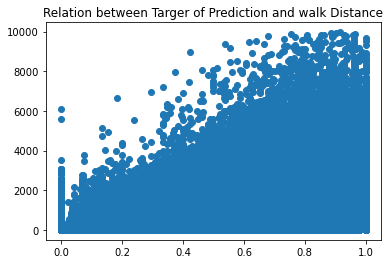

In [54]:
plt.scatter(df.winPlacePerc, df['walkDistance'])
plt.title('Relation between Targer of Prediction and walk Distance')

Text(0.5, 1.0, 'Relation between Targer of Prediction and winPoints')

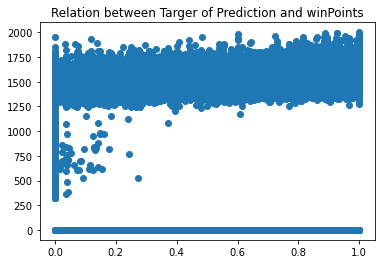

In [55]:
plt.scatter(df.winPlacePerc, df['winPoints'])
plt.title('Relation between Targer of Prediction and winPoints')

<Figure size 1080x720 with 0 Axes>

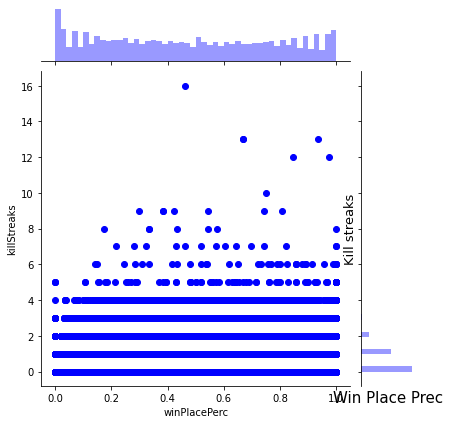

In [56]:
plt.figure(figsize=(15,10))
sns.jointplot(x='winPlacePerc', y='killStreaks', data=df, color='b')
plt.xlabel('Win Place Prec', fontsize=15)
plt.ylabel('Kill streaks',fontsize=13)
plt.show()

In [57]:
print('The average person kills {:.4f} players on their own team'.format(df['teamKills'].mean()))
print('50% of people have killed ',df['teamKills'].quantile(0.50),' team players')
print('75% of people have killed ',df['teamKills'].quantile(0.75),' team players')
print('99% of people have killed ',df['teamKills'].quantile(0.99),' team players')
print('while the most kills recorded in the data is', df['teamKills'].max())

The average person kills 0.0240 players on their own team
50% of people have killed  0.0  team players
75% of people have killed  0.0  team players
99% of people have killed  1.0  team players
while the most kills recorded in the data is 10


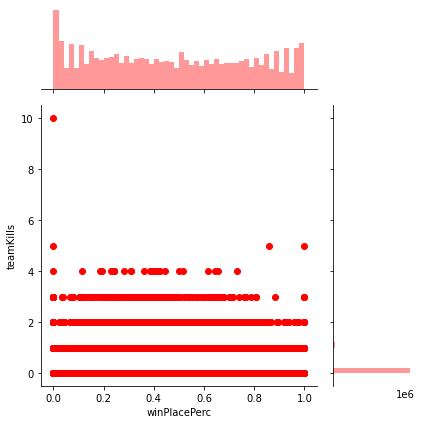

In [58]:
sns.jointplot(x='winPlacePerc', y='teamKills', data=df, ratio=3, color='r')

#### Hypothesis Testing

In [59]:
#Help from Python
from scipy.stats import shapiro

DataToTest = data['winPlacePerc']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=1.00, p=1.000000000000000000000000000000
Normal distribution


In [60]:
#Lets genrate normally distributed data from Python
from numpy.random import randn
DataToTest = randn(100)

In [61]:
DataToTest

array([-1.64650184e+00,  1.68837257e+00, -8.25180489e-01,  9.63727671e-01,
       -1.67327321e+00,  6.00384492e-01, -1.67502283e+00,  1.45753123e+00,
       -2.27858669e-01, -1.81554466e-01,  2.26633551e-01, -4.56585708e-01,
       -8.60932982e-01,  6.84080872e-01, -6.13879864e-02,  8.06197324e-01,
        3.37007415e-01, -5.43806311e-01,  6.10236641e-01, -4.66764093e-01,
       -1.36860116e+00,  1.67309552e-01, -1.81818067e+00,  5.61209547e-01,
       -1.11860000e+00,  1.22260770e+00, -6.04898778e-02,  1.60900594e-01,
        1.02582571e+00, -1.17039227e+00,  7.31634950e-01, -1.01852701e+00,
       -1.60206172e-01, -3.08724642e-02,  4.88451032e-01,  1.53963812e+00,
        2.24390717e+00, -3.04702791e-02,  5.91119512e-01, -1.95876506e-01,
       -8.87078286e-01,  5.28507148e-01, -6.88681417e-01, -1.96396330e-01,
       -1.71696882e-03,  8.13553582e-01, -5.18749594e-01,  1.80013988e+00,
        4.52764363e-01, -2.39506787e-01,  6.97323797e-01, -5.48887373e-01,
        1.33553457e+00,  

In [62]:
stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.99, p=0.974824845790863037109375000000
Normal distribution


In [63]:
df['damageDealt'].mean()

130.5581807769899

$$z= \frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt n}}$$
$$H_{o}: \space \space  \mu = 130$$$$H_{a}: \space \space  \mu \ne 130$$
step 1: create the hypothesis (Null and Alternate Hypothesis)

Step 2: Appropriate statistical test

step 3: let set $\alpha$ as .05 i.e Type l error

step 4: Get data

Step 5: Analyze

# This is a 2 sided test

value of $z$ at .05 making it .025 for 2 sided we know from $z table=$ $\underline{+}$1.96

In [64]:
sampData=df['damageDealt'][np.argsort(np.random.random(1000))[:70]]

In [65]:
meanSampData=sampData.mean()
hypMean=130
N=70
standPop=np.std(df['damageDealt'])

In [66]:
(meanSampData-hypMean)/(standPop/math.sqrt(N))

0.4292675723851797

as calculated z score -1.20 is more than -1.96 (tabular z score), Hence we accept the null hypothesis

Observed value = -1.20
Critical value = -1.96

# Ttest

$$t= \frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt n}}$$
expected mean hence $\mu$ degree of freedom =N-1

In [68]:
import scipy.stats as st

In [69]:
st.ttest_1samp(sampData,130)

Ttest_1sampResult(statistic=0.4129899393018195, pvalue=0.6808945709821259)

In [70]:
0.09>0.05

True

 Hence we accept the null hypothesis